Выполнил: Логинов Максим 3821Б1ФИ2

#Домашняя работа 1

# Описание датасета:
Мы пытаемся построить модель, которая будет предсказывать количество прослушиваний песни на платформе Spotify (Stream) на основе доступных характеристик песен.

Цель модели регрессии — определить численное значение целевой переменной (Stream) с максимальной точностью.

In [97]:
import pandas as pd
import numpy as np


data = pd.read_csv('Spotify_Youtube.csv')
data

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,20713,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,0.582,0.926,5.0,...,https://www.youtube.com/watch?v=5SHmKFKlNqI,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,71678.0,1113.0,0.0,Provided to YouTube by Routenote\n\nJUST DANCE...,True,True,9.227144e+06
20714,20714,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,0.531,0.936,4.0,...,https://www.youtube.com/watch?v=ocTH6KxllDQ,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,164741.0,2019.0,0.0,Provided to YouTube by Routenote\n\nSET FIRE T...,True,True,1.089818e+07
20715,20715,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,spotify:track:4jk00YxPtPbhvHJE9N4ddv,0.443,0.830,4.0,...,https://www.youtube.com/watch?v=5wFhE-HY0hg,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,35646.0,329.0,0.0,Provided to YouTube by Routenote\n\nOUTSIDE HA...,True,True,6.226110e+06
20716,20716,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,spotify:track:5EyErbpsugWliX006eTDex,0.417,0.767,9.0,...,https://www.youtube.com/watch?v=VMFLbFRNCn0,ONLY GIRL HARDSTYLE,SICK LEGEND - Topic,6533.0,88.0,0.0,Provided to YouTube by Routenote\n\nONLY GIRL ...,True,True,6.873961e+06


#Проверим пропущенные значения и обработаем их

In [98]:
data = data.replace("-", np.nan)

data.isnull().sum()

,0
Unnamed: 0,0
Artist,0
Url_spotify,0
Track,0
Album,0
Album_type,0
Uri,0
Danceability,2
Energy,2
Key,2


In [99]:
#удаляем пустые строчки
data = data.dropna()
data = data.replace("nan", np.nan).replace("NaN", np.nan)
data = data.dropna(how='any')

Убираем ненужные данные. Они не будут сильно влиять на предсказывание прослушиваний треков.

In [100]:
columns_for_remove = ["Album", "Album_type", "Url_spotify", "Uri", "Url_youtube", "Artist", "Track", "Title", "Channel", "Description"]
data = data.drop(data.columns[0], axis=1)
data = data.drop(columns=columns_for_remove)

#Визуализизация данных и основные характеристики

Визуализируем матрицу рассеивания

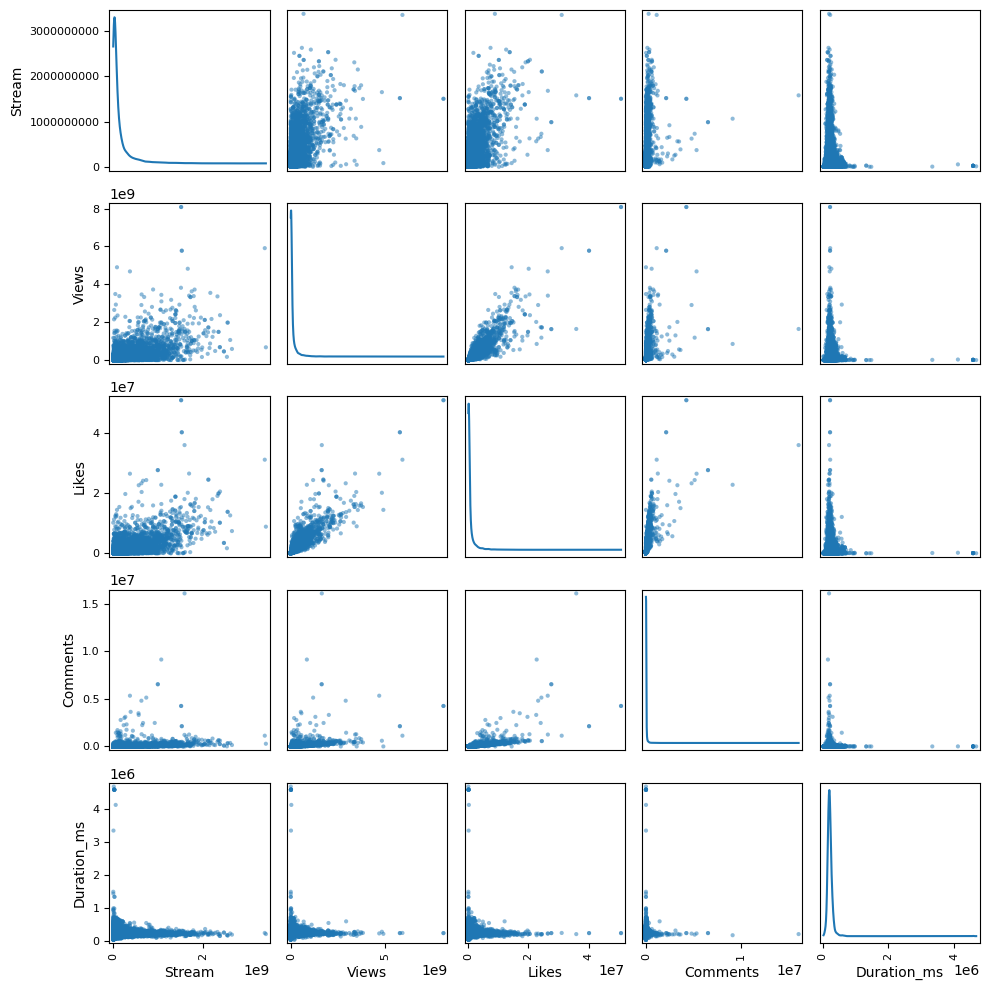

In [101]:
import pandas as pd
import matplotlib.pyplot as plt

selected_columns = ['Stream', 'Views', 'Likes', 'Comments', 'Licensed', 'official_video', 'Duration_ms']
filtered_data = data[selected_columns]

# Строим матрицу рассеивания
scatter_matrix = pd.plotting.scatter_matrix(filtered_data, figsize=(10, 10), diagonal='kde')
plt.tight_layout()
plt.show()


<Axes: xlabel='Stream', ylabel='Count'>

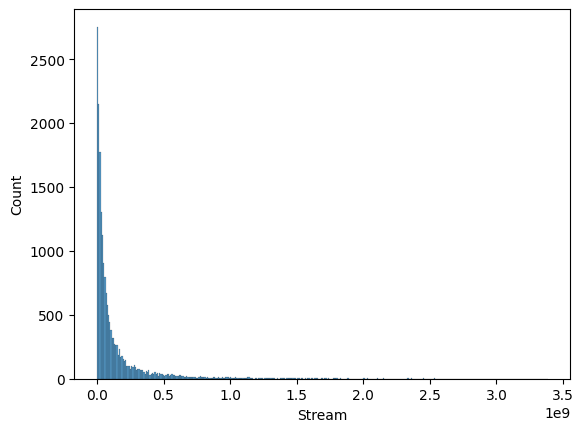

In [102]:
import seaborn as sns
sns.histplot(data=data, x='Stream')

In [103]:
data.describe()


,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,19170.000000,19170.000000,19170.000000,19170.000000,19170.000000,19170.000000,19170.000000,19170.000000,19170.000000,19170.000000,1.917000e+04,1.917000e+04,1.917000e+04,1.917000e+04,1.917000e+04
mean,0.621178,0.636150,5.292645,-7.615305,0.094944,0.287817,0.055476,0.191322,0.528267,120.607345,2.247612e+05,9.719768e+07,6.823531e+05,2.838656e+04,1.382746e+08
std,0.165533,0.213439,3.579947,4.617605,0.104931,0.285630,0.192768,0.165217,0.244996,29.588308,1.278468e+05,2.799997e+08,1.820550e+06,1.977979e+05,2.477309e+08
min,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,2.600000e+01,0.000000e+00,0.000000e+00,6.574000e+03
25%,0.520000,0.510000,2.000000,-8.745000,0.035700,0.043600,0.000000,0.094100,0.338000,96.997500,1.802670e+05,2.070213e+06,2.447350e+04,5.830000e+02,1.786937e+07
50%,0.639000,0.667000,5.000000,-6.504000,0.050600,0.188000,0.000002,0.125000,0.535000,119.969000,2.133210e+05,1.568959e+07,1.332770e+05,3.515500e+03,5.037938e+07
75%,0.742000,0.798000,8.000000,-4.918500,0.104000,0.469000,0.000436,0.234000,0.724000,139.946000,2.519630e+05,7.369040e+07,5.423462e+05,1.494100e+04,1.407579e+08
max,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09


In [104]:
data.corr()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Licensed,official_video,Stream
Danceability,1.000000,0.237308,0.040010,0.358489,0.227250,-0.280314,-0.322392,-0.081334,0.464737,-0.063116,-0.090393,0.089105,0.099296,0.043748,0.006245,0.038269,0.072299
Energy,0.237308,1.000000,0.032441,0.745109,0.091493,-0.661459,-0.316586,0.174765,0.391466,0.156221,0.022895,0.066530,0.061980,0.045151,0.080678,0.109283,0.044376
Key,0.040010,0.032441,1.000000,0.028907,0.022568,-0.031197,-0.000131,-0.007418,0.044923,0.000744,0.003057,0.009293,0.007948,0.007949,-0.000059,0.010806,-0.006250
Loudness,0.358489,0.745109,0.028907,1.000000,0.070431,-0.552748,-0.557273,0.086952,0.316783,0.143877,0.010756,0.118406,0.123731,0.059282,0.099907,0.144048,0.118746
Speechiness,0.227250,0.091493,0.022568,0.070431,1.000000,-0.099049,-0.112720,0.065696,0.061185,0.051544,-0.049266,-0.008672,0.014429,0.010993,-0.061793,-0.052912,-0.015688
Acousticness,-0.280314,-0.661459,-0.031197,-0.552748,-0.099049,1.000000,0.283356,-0.053317,-0.205586,-0.129236,-0.023606,-0.069905,-0.078123,-0.052988,-0.070493,-0.087191,-0.104716
Instrumentalness,-0.322392,-0.316586,-0.000131,-0.557273,-0.112720,0.283356,1.000000,-0.057004,-0.269038,-0.081878,-0.006245,-0.080820,-0.081171,-0.032473,-0.057083,-0.069582,-0.092336
Liveness,-0.081334,0.174765,-0.007418,0.086952,0.065696,-0.053317,-0.057004,1.000000,0.033008,0.008357,-0.000594,-0.017140,-0.023562,-0.013107,-0.002736,0.001866,-0.037141
Valence,0.464737,0.391466,0.044923,0.316783,0.061185,-0.205586,-0.269038,0.033008,1.000000,0.091131,-0.050988,0.038699,0.013986,0.018601,0.017470,0.009054,-0.011480
Tempo,-0.063116,0.156221,0.000744,0.143877,0.051544,-0.129236,-0.081878,0.008357,0.091131,1.000000,-0.014836,-0.001373,0.002287,0.008085,0.008687,0.021118,0.002584


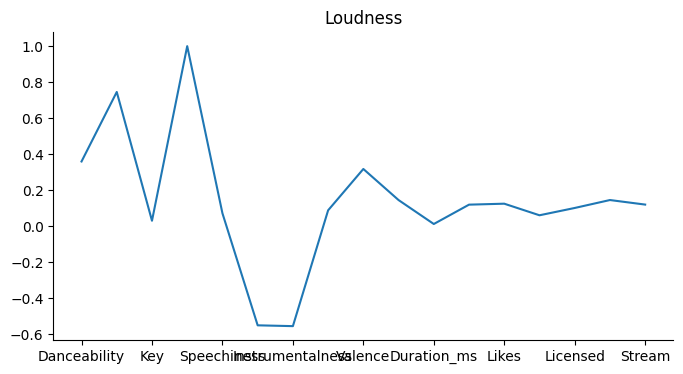

In [105]:
from matplotlib import pyplot as plt
_df_11['Loudness'].plot(kind='line', figsize=(8, 4), title='Loudness')
plt.gca().spines[['top', 'right']].set_visible(False)

Можем заметить сильную корреляцию между просмотрами на youtube + лайками и количеством прослушиваний.
Также можно заметить отрицательную корреляцию: громкость прослушивания и инструментальность.

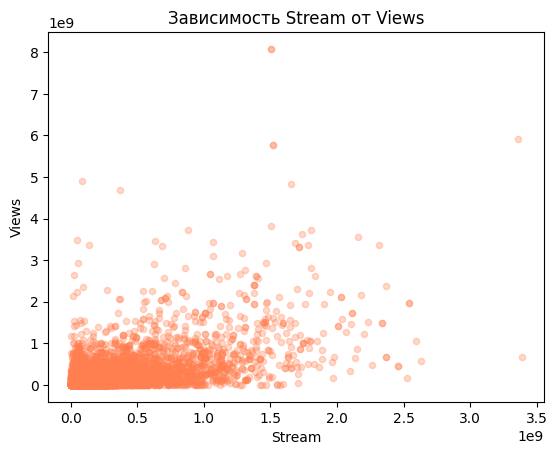

In [106]:
data.plot(kind = 'scatter', x = 'Stream', y = 'Views', alpha=.3, color = 'coral')
plt.title('Зависимость Stream от Views')
plt.show()

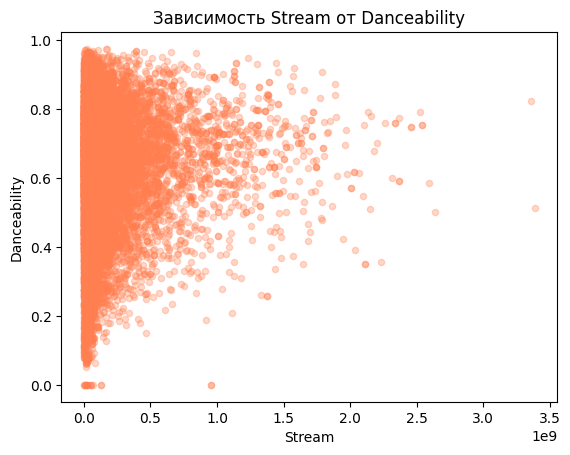

In [107]:
data.plot(kind = 'scatter', x = 'Stream', y = 'Danceability', alpha=.3, color = 'coral')
plt.title('Зависимость Stream от Danceability')
plt.show()

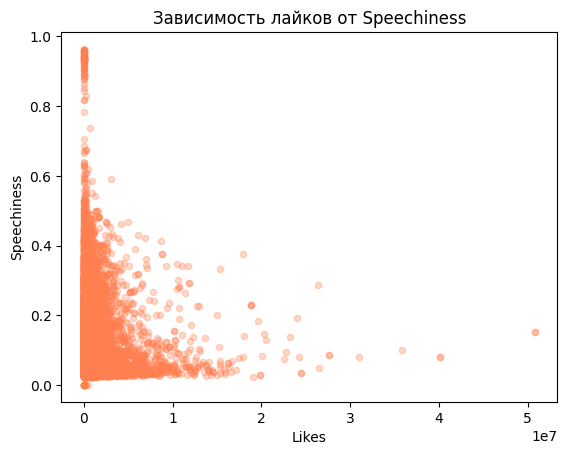

In [108]:
data.plot(kind = 'scatter', x = 'Likes', y = 'Speechiness', alpha=.3, color = 'coral')
plt.title('Зависимость лайков от Speechiness')
plt.show()

**Подсчитываем среднее значение для каждого признака**

In [109]:
mean_values = data.mean()
print("Средние значения:\n", mean_values)

Средние значения:
 Danceability                0.621178
Energy                       0.63615
Key                         5.292645
Loudness                   -7.615305
Speechiness                 0.094944
Acousticness                0.287817
Instrumentalness            0.055476
Liveness                    0.191322
Valence                     0.528267
Tempo                     120.607345
Duration_ms            224761.202139
Views                97197683.381847
Likes                  682353.144914
Comments                28386.558059
Licensed                    0.714763
official_video              0.793949
Stream              138274645.540063
dtype: object


**Подсчитываем разброс для каждого признака**

In [110]:
variance_values = data.var()
print("\nРазброс (дисперсия):\n", variance_values)


Разброс (дисперсия):
 Danceability                    0.027401
Energy                          0.045556
Key                            12.816019
Loudness                       21.322276
Speechiness                      0.01101
Acousticness                    0.081585
Instrumentalness                 0.03716
Liveness                        0.027297
Valence                         0.060023
Tempo                         875.467958
Duration_ms            16344803180.34474
Views                78399811455418368.0
Likes               3314402992863.371094
Comments               39123993253.51638
Licensed                        0.203888
official_video                  0.163603
Stream               61370599872569928.0
dtype: object


Корреляционная матрица

In [111]:
correlation_matrix = data.corr()
correlation_matrix

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Licensed,official_video,Stream
Danceability,1.000000,0.237308,0.040010,0.358489,0.227250,-0.280314,-0.322392,-0.081334,0.464737,-0.063116,-0.090393,0.089105,0.099296,0.043748,0.006245,0.038269,0.072299
Energy,0.237308,1.000000,0.032441,0.745109,0.091493,-0.661459,-0.316586,0.174765,0.391466,0.156221,0.022895,0.066530,0.061980,0.045151,0.080678,0.109283,0.044376
Key,0.040010,0.032441,1.000000,0.028907,0.022568,-0.031197,-0.000131,-0.007418,0.044923,0.000744,0.003057,0.009293,0.007948,0.007949,-0.000059,0.010806,-0.006250
Loudness,0.358489,0.745109,0.028907,1.000000,0.070431,-0.552748,-0.557273,0.086952,0.316783,0.143877,0.010756,0.118406,0.123731,0.059282,0.099907,0.144048,0.118746
Speechiness,0.227250,0.091493,0.022568,0.070431,1.000000,-0.099049,-0.112720,0.065696,0.061185,0.051544,-0.049266,-0.008672,0.014429,0.010993,-0.061793,-0.052912,-0.015688
Acousticness,-0.280314,-0.661459,-0.031197,-0.552748,-0.099049,1.000000,0.283356,-0.053317,-0.205586,-0.129236,-0.023606,-0.069905,-0.078123,-0.052988,-0.070493,-0.087191,-0.104716
Instrumentalness,-0.322392,-0.316586,-0.000131,-0.557273,-0.112720,0.283356,1.000000,-0.057004,-0.269038,-0.081878,-0.006245,-0.080820,-0.081171,-0.032473,-0.057083,-0.069582,-0.092336
Liveness,-0.081334,0.174765,-0.007418,0.086952,0.065696,-0.053317,-0.057004,1.000000,0.033008,0.008357,-0.000594,-0.017140,-0.023562,-0.013107,-0.002736,0.001866,-0.037141
Valence,0.464737,0.391466,0.044923,0.316783,0.061185,-0.205586,-0.269038,0.033008,1.000000,0.091131,-0.050988,0.038699,0.013986,0.018601,0.017470,0.009054,-0.011480
Tempo,-0.063116,0.156221,0.000744,0.143877,0.051544,-0.129236,-0.081878,0.008357,0.091131,1.000000,-0.014836,-0.001373,0.002287,0.008085,0.008687,0.021118,0.002584


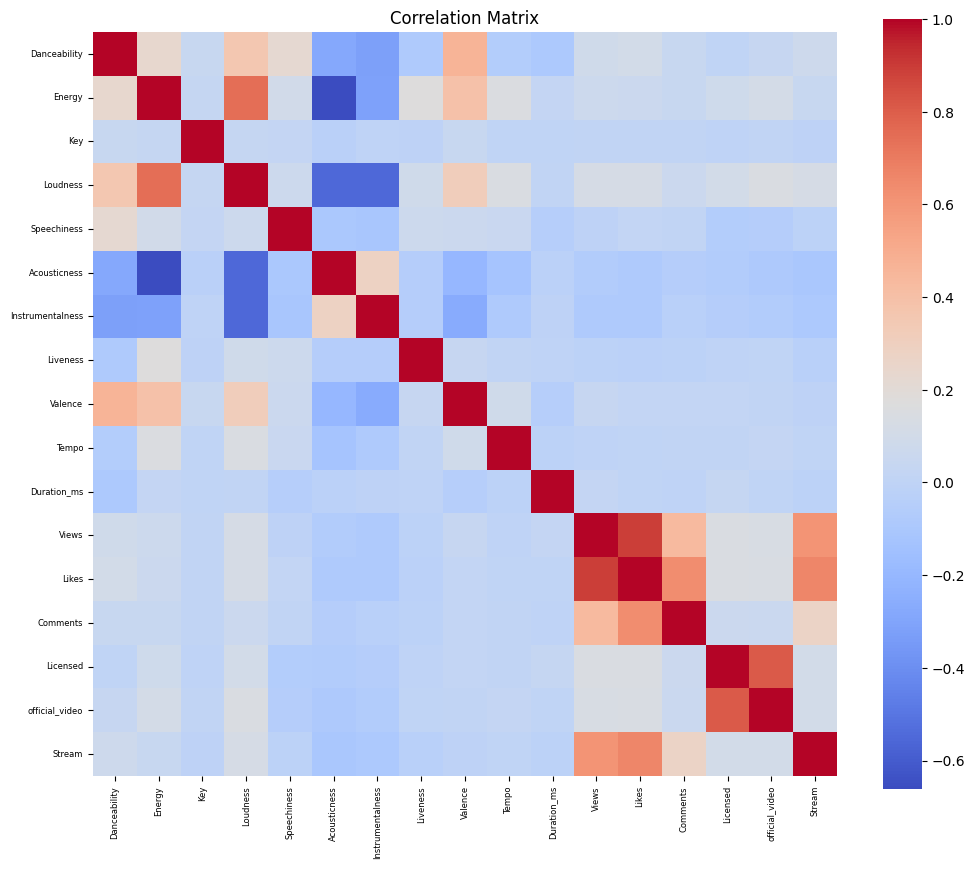

In [112]:
correlation_matrix = data.corr()

plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix, square=True, cmap="coolwarm", fmt=".1f")
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.title("Correlation Matrix")
plt.show()

#Обработка категориальных признаков

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19170 entries, 0 to 20717
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Danceability      19170 non-null  float64
 1   Energy            19170 non-null  float64
 2   Key               19170 non-null  float64
 3   Loudness          19170 non-null  float64
 4   Speechiness       19170 non-null  float64
 5   Acousticness      19170 non-null  float64
 6   Instrumentalness  19170 non-null  float64
 7   Liveness          19170 non-null  float64
 8   Valence           19170 non-null  float64
 9   Tempo             19170 non-null  float64
 10  Duration_ms       19170 non-null  float64
 11  Views             19170 non-null  float64
 12  Likes             19170 non-null  float64
 13  Comments          19170 non-null  float64
 14  Licensed          19170 non-null  object 
 15  official_video    19170 non-null  object 
 16  Stream            19170 non-null  float64
dty

Как мы видим, столбцы Licensed и official_videl имеют тип object.
Приведем эти признаки к категориальному типу

In [114]:

data['Licensed'] = data['Licensed'].astype('category')
data['official_video'] = data['official_video'].astype('category')

data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 19170 entries, 0 to 20717
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Danceability      19170 non-null  float64 
 1   Energy            19170 non-null  float64 
 2   Key               19170 non-null  float64 
 3   Loudness          19170 non-null  float64 
 4   Speechiness       19170 non-null  float64 
 5   Acousticness      19170 non-null  float64 
 6   Instrumentalness  19170 non-null  float64 
 7   Liveness          19170 non-null  float64 
 8   Valence           19170 non-null  float64 
 9   Tempo             19170 non-null  float64 
 10  Duration_ms       19170 non-null  float64 
 11  Views             19170 non-null  float64 
 12  Likes             19170 non-null  float64 
 13  Comments          19170 non-null  float64 
 14  Licensed          19170 non-null  category
 15  official_video    19170 non-null  category
 16  Stream            19170 non

Выведем количество уникальных значений для каждого категориального признака

In [115]:
data['Licensed'].unique()

[True, False]
Categories (2, bool): [False, True]

In [116]:
data['official_video'].unique()

[True, False]
Categories (2, bool): [False, True]

 заменим False и True на 0 и 1.

In [117]:
data.replace({"Licensed": {"true": 1, "false": 0}, "official_video": {"true": 1, "false": 0}}, inplace=True)
data["Licensed"] = data["Licensed"].astype(int)
data["official_video"] = data["official_video"].astype(int)
data

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Licensed,official_video,Stream
0,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.7720,138.559,222640.0,693555221.0,6220896.0,169907.0,1,1,1.040235e+09
1,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.8520,92.761,200173.0,72011645.0,1079128.0,31003.0,1,1,3.100837e+08
2,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.5510,108.014,215150.0,8435055.0,282142.0,7399.0,1,1,6.306347e+07
3,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.5780,120.423,233867.0,211754952.0,1788577.0,55229.0,1,1,4.346636e+08
4,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.5250,167.953,340920.0,618480958.0,6197318.0,155930.0,1,1,6.172597e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,0.582,0.926,5.0,-6.344,0.0328,0.448000,0.000000,0.0839,0.6580,90.002,94667.0,71678.0,1113.0,0.0,1,1,9.227144e+06
20714,0.531,0.936,4.0,-1.786,0.1370,0.028000,0.000000,0.0923,0.6570,174.869,150857.0,164741.0,2019.0,0.0,1,1,1.089818e+07
20715,0.443,0.830,4.0,-4.679,0.0647,0.024300,0.000000,0.1540,0.4190,168.388,136842.0,35646.0,329.0,0.0,1,1,6.226110e+06
20716,0.417,0.767,9.0,-4.004,0.4190,0.356000,0.018400,0.1080,0.5390,155.378,108387.0,6533.0,88.0,0.0,1,1,6.873961e+06


#Проводим нормализацию



In [118]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data_norm = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

data_norm

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Licensed,official_video,Stream
0,1.189054,0.322582,0.197593,0.202774,0.782026,-0.978411,-0.275704,2.552328,0.994869,0.606730,-0.016592,2.129906,3.042315,0.715499,0.631717,0.509438,3.640982
1,0.331194,0.313212,0.756275,0.389889,-0.617031,-0.703433,-0.284227,-0.877787,1.321413,-0.941151,-0.192331,-0.089953,0.217948,0.013228,0.631717,0.509438,0.693549
2,0.445978,1.343976,-1.199112,0.798120,-0.407363,-0.858882,-0.044488,-0.455907,0.092790,-0.425630,-0.075179,-0.317018,-0.219836,-0.106109,0.631717,0.509438,-0.303608
3,0.409730,0.481882,-0.919771,0.390972,-0.657058,-1.007627,2.352753,-0.770652,0.202999,-0.006230,0.071226,0.409144,0.607647,0.135710,0.631717,0.509438,1.196446
4,0.252658,0.271044,1.314958,-0.219101,0.724844,-0.919102,-0.287791,-0.735546,-0.013337,1.600189,0.908602,1.861777,3.029364,0.644834,0.631717,0.509438,1.933540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19165,-0.236685,1.358032,-0.081748,0.275324,-0.592252,0.560822,-0.287791,-0.650202,0.529543,-1.034400,-1.017605,-0.346888,-0.374204,-0.143517,0.631717,0.509438,-0.520932
19166,-0.544789,1.404884,-0.361089,1.262442,0.400812,-0.909649,-0.287791,-0.599358,0.525461,1.833936,-0.578084,-0.346556,-0.373707,-0.143517,0.631717,0.509438,-0.514186
19167,-1.076421,0.908244,-0.361089,0.635910,-0.288233,-0.922603,-0.287791,-0.225901,-0.446008,1.614891,-0.687710,-0.347017,-0.374635,-0.143517,0.631717,0.509438,-0.533046
19168,-1.233494,0.613070,1.035617,0.782094,3.088374,0.238719,-0.192338,-0.504330,0.043808,1.175179,-0.910287,-0.347121,-0.374767,-0.143517,0.631717,0.509438,-0.530431


In [119]:
data[['Acousticness', 'Instrumentalness', 'Views', 'Likes', 'Comments']]

,Acousticness,Instrumentalness,Views,Likes,Comments
0,0.008360,0.002330,693555221.0,6220896.0,169907.0
1,0.086900,0.000687,72011645.0,1079128.0,31003.0
2,0.042500,0.046900,8435055.0,282142.0,7399.0
3,0.000015,0.509000,211754952.0,1788577.0,55229.0
4,0.025300,0.000000,618480958.0,6197318.0,155930.0
...,...,...,...,...,...
20713,0.448000,0.000000,71678.0,1113.0,0.0
20714,0.028000,0.000000,164741.0,2019.0,0.0
20715,0.024300,0.000000,35646.0,329.0,0.0
20716,0.356000,0.018400,6533.0,88.0,0.0


#Разделение данных на обучающую и тестовую выборки

In [120]:
from sklearn.model_selection import train_test_split

X = data_norm.drop(columns=['Stream'])
y = data_norm['Stream']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Размер обучающей выборки:", X_train.shape, y_train.shape)
print("Размер тестовой выборки:", X_test.shape, y_test.shape)

Размер обучающей выборки: (15336, 16) (15336,)
Размер тестовой выборки: (3834, 16) (3834,)


#Запустить регрессию

In [121]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

print("Linear Regression\n\n"
      "\nRMSE_train - ", RMSE_train,
      "\nRMSE_test - ", RMSE_test,
      "\nR2_train - ", R2_train,
      "\nR2_test - ", R2_test)

Linear Regression


RMSE_train -  0.7049374353771356 
RMSE_test -  0.8028448877891947 
R2_train -  0.4860318275504629 
R2_test -  0.4306404620143407


In [122]:
lin_reg = LinearRegression().fit(X_train, y_train)
print(f'Linear score: {lin_reg.score(X_test, y_test)}')

Linear score: 0.4306404620143407


In [123]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

print("KNeighborsRegressor\n\n"
      "\nRMSE_train - ", RMSE_train,
      "\nRMSE_test - ", RMSE_test,
      "\nR2_train - ", R2_train,
      "\nR2_test - ", R2_test)

KNeighborsRegressor


RMSE_train -  0.5934885476088799 
RMSE_test -  0.7412759022708499 
R2_train -  0.6356995031802618 
R2_test -  0.5146186647618913


In [124]:
kneigh_reg = KNeighborsRegressor().fit(X_train, y_train)
print(f'KneighborsRegression: {kneigh_reg.score(X_test, y_test)}')

KneighborsRegression: 0.5146186647618913


### Random Forest (до подбора гиперпараметров)

In [125]:

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

print("Random Forest \n\n"
      "\nRMSE_train - ", RMSE_train,
      "\nRMSE_test - ", RMSE_test,
      "\nR2_train - ", R2_train,
      "\nR2_test - ", R2_test)

Random Forest 


RMSE_train -  0.23902325550603312 
RMSE_test -  0.616866902083597 
R2_train -  0.9409098092240828 
R2_test -  0.6638707971653585


In [126]:
RFR = KNeighborsRegressor().fit(X_train, y_train)
print(f'RandomForestRegressor : {RFR.score(X_test, y_test)}')

RandomForestRegressor : 0.5146186647618913


### Подбор гиперпараметров для Random Forest

In [127]:

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

n_arr = np.array([50, 100, 150, 200, 250])

ppl = Pipeline([('fit', RandomForestRegressor())])

params = {
    'fit__n_estimators': n_arr,
}

model = GridSearchCV(ppl, params, scoring='neg_mean_squared_error')
model.fit(X_train, y_train)

model.best_score_, model.best_params_

(-0.41132507913141414, {'fit__n_estimators': 250})

Text(0, 0.5, 'MSE')

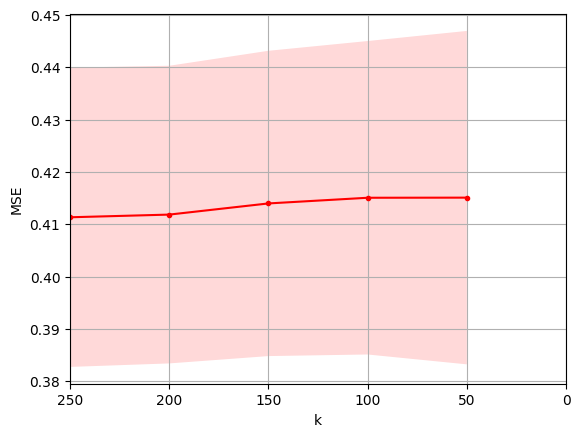

In [128]:
MSE_arr = -model.cv_results_['mean_test_score']
std_arr = model.cv_results_['std_test_score']
plt.plot(n_arr, MSE_arr, 'r.-')
plt.fill_between(n_arr, MSE_arr - std_arr, MSE_arr + std_arr, alpha=0.15, facecolor='red')
plt.xlim([max(n_arr), 0])
plt.grid()
plt.xlabel('k')
plt.ylabel('MSE')

In [129]:
model.best_params_['fit__n_estimators']

250

In [130]:

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=model.best_params_['fit__n_estimators'])
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

print("Random Forest (после подбора гиперпараметров)\n\n"
      "\nRMSE_train - ", RMSE_train,
      "\nRMSE_test - ", RMSE_test,
      "\nR2_train - ", R2_train,
      "\nR2_test - ", R2_test)

Random Forest (после подбора гиперпараметров)


RMSE_train -  0.23561712496410633 
RMSE_test -  0.61283620111896 
R2_train -  0.9425819046147652 
R2_test -  0.6682490834557377


График фактических значений против предсказанных

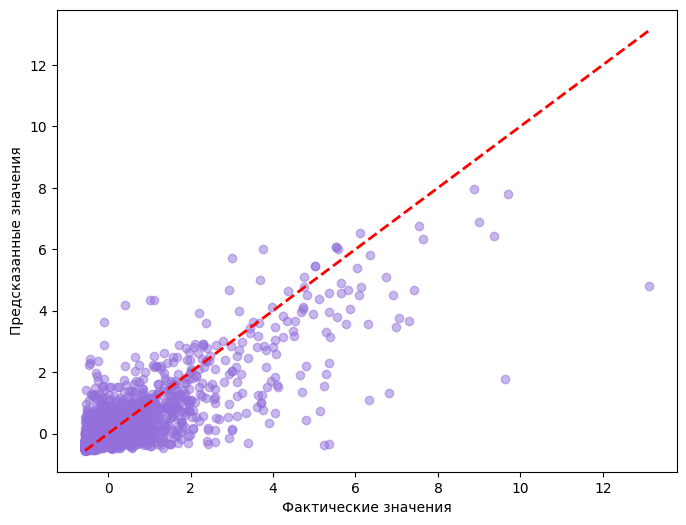

In [142]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_predict, alpha=0.5, color = 'mediumpurple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.show()

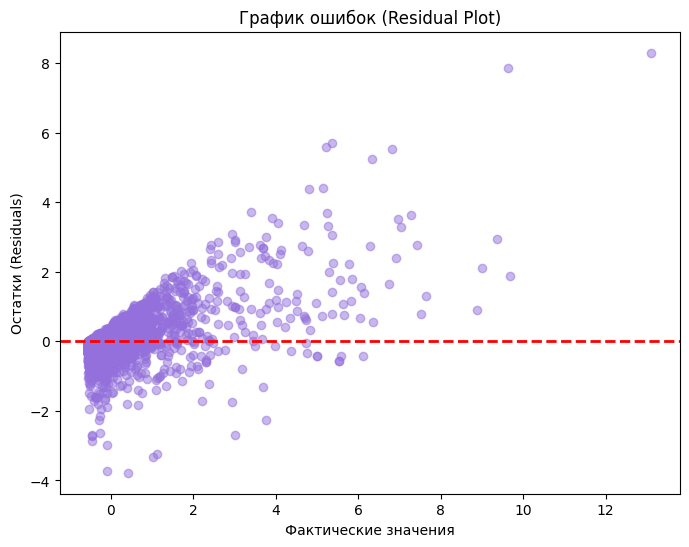

In [132]:
residuals = y_test - y_test_predict

plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, alpha=0.5, color = 'mediumpurple')
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel("Фактические значения")
plt.ylabel("Остатки (Residuals)")
plt.title("График ошибок (Residual Plot)")
plt.show()

Можем наблюдать достаточную неточность предугадываемых значений по отношению к действительным.

#Вывод
Линейная регрессия показывает слабое качество предсказания. Значение на тестовой выборке (0.4306) говорит о том, что модель объясняет лишь около 43% вариации данных.

Модель KNeighbors демонстрирует более высокую точность, чем линейная регрессия на тестовой выборке. Значение (0.5146) говорит о том, что модель объясняет около 51% вариации данных.

RandomForest показывает наилучшие результаты. Значение на тестовой выборке (0.6652) указывает на то, что модель объясняет около 67% вариации данных, что значительно лучше, чем у других моделей.

RandomForest является наиболее точной моделью для текущих данных, но имеет риск переобучения.
KNeighbors показывает неплохие результаты и лучше балансирует между точностью и обобщающей способностью.
Линейная регрессия работает хуже остальных моделей и плохо справляется с нелинейными зависимостями в данных.

# Домашняя работа 2

Задача: Подчистить и исправить все, что было сделано в домашнем задании для 2 ноября. С теми же данными - решить задачу кластеризации 3 методами: KMeans, DBSCAN и любым другим на ваш выбор. В задаче обучения с учителем вы не должны использовать целевую метку y. В случае задачи классификации сравнить выход каждого алгоритма кластеризации с истинными метками. Сделать выводы.

# Кластеризация методом KMeans

Подберём гиперпараметры

In [133]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import make_scorer

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

parameters = {'n_clusters': list(range(80, 101))}
km = KMeans()
clf = GridSearchCV(km, parameters)
clf.fit(X)
clusters_kmeans = clf.best_params_['n_clusters']
clf.best_params_

{'n_clusters': 98}

In [134]:
kmeans = KMeans(n_clusters=clusters_kmeans, random_state=42)
data_norm['KMeans_Cluster'] = kmeans.fit_predict(X)
silhouette_kmeans = silhouette_score(X, data_norm['KMeans_Cluster'])
print(f"Силуэтный коэффициент для KMeans: {silhouette_kmeans}")

Силуэтный коэффициент для KMeans: 0.09499888846689634


Визуализируем кластеры KMeans

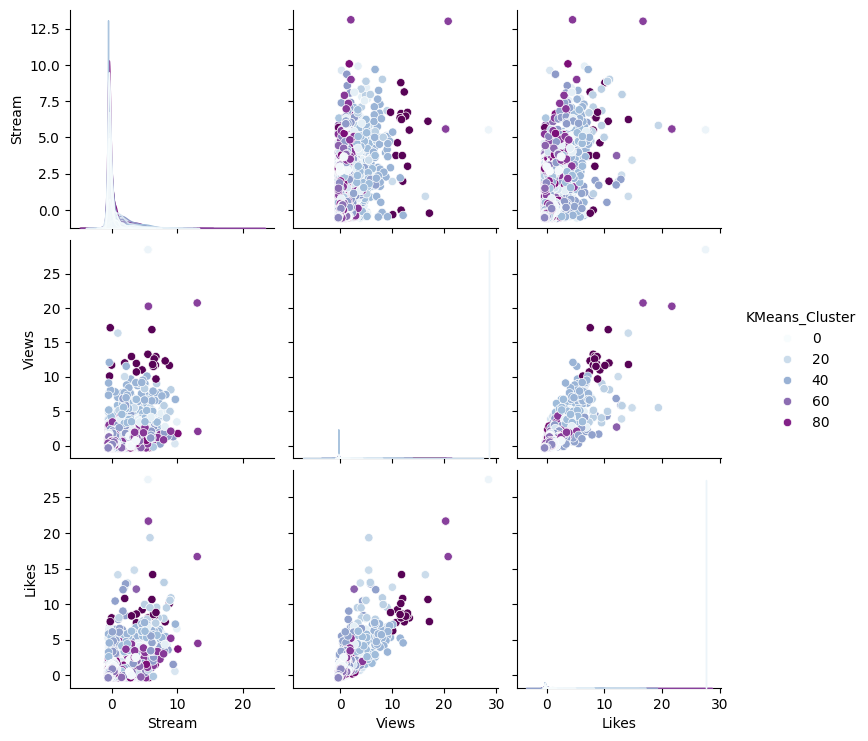

In [135]:
sns.pairplot(data_norm, vars=['Stream', 'Views', 'Likes'], hue='KMeans_Cluster', palette='BuPu')
plt.show()


#Кластеризация методом DBSCAN


In [136]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.cluster import DBSCAN
def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    if len(set(labels)) > 1:
        return silhouette_score(X, labels)
    else:
        return -1
parameters = {
    'eps': [2, 3, 4],
    'min_samples': [10, 20, 30]
}
dbscan = DBSCAN()
clf_dbscan = GridSearchCV(dbscan, parameters, scoring=make_scorer(silhouette_scorer))
clf_dbscan.fit(X)
clf_dbscan.best_params_['min_samples'] = 20
clf_dbscan.best_params_['eps'] = 3
eps_dbscan = clf_dbscan.best_params_['eps']
min_samples_dbscan = clf_dbscan.best_params_['min_samples']
clf_dbscan.best_params_

{'eps': 3, 'min_samples': 20}

Подберём гиперпараметры

In [137]:

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=3.0, min_samples=20)
data_norm['DBSCAN_Cluster'] = dbscan.fit_predict(X)
silhouette_dbscan = silhouette_score(X, data_norm['DBSCAN_Cluster'])
print(f"Силуэтный коэффициент для DBSCAN: {silhouette_dbscan}")

Силуэтный коэффициент для DBSCAN: 0.5965066592832218


Визуализируем кластеры DBSCAN

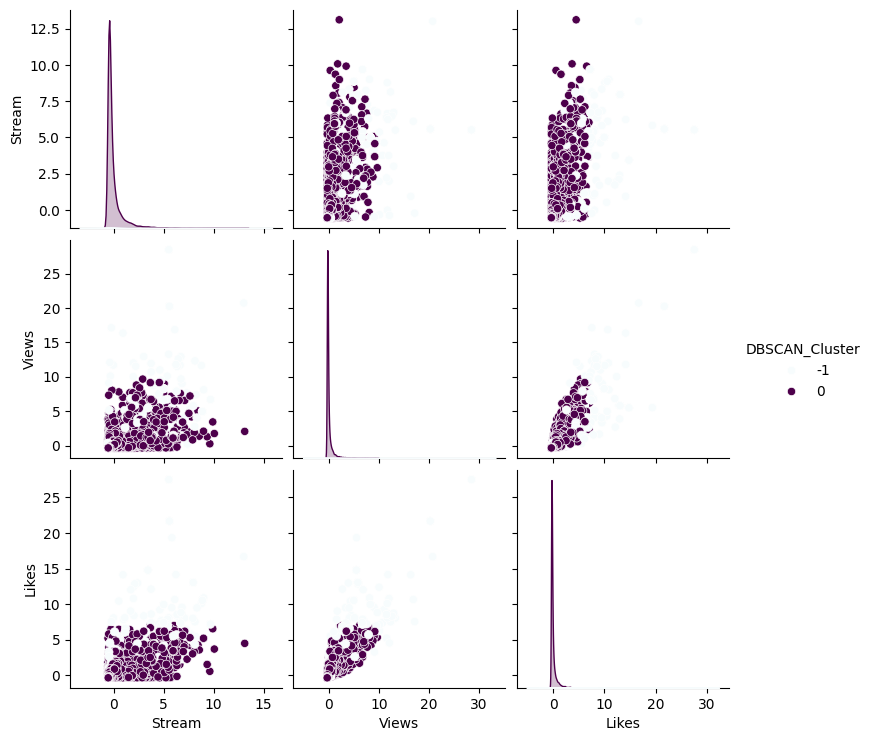

In [143]:
sns.pairplot(data_norm, vars=['Stream', 'Views', 'Likes'], hue='DBSCAN_Cluster', palette='BuPu')
plt.show()

#Кластеризация методом MeanShift

In [139]:
from sklearn.cluster import MeanShift

mean_shift = MeanShift()
data_norm['MeanShift_Cluster'] = mean_shift.fit_predict(X)
silhouette_ms = silhouette_score(X, data_norm['MeanShift_Cluster'])
print(f"Силуэтный коэффициент для Mean Shift: {silhouette_ms}")


Силуэтный коэффициент для Mean Shift: 0.32298485450524567


Визуализация кластеров MeanShift

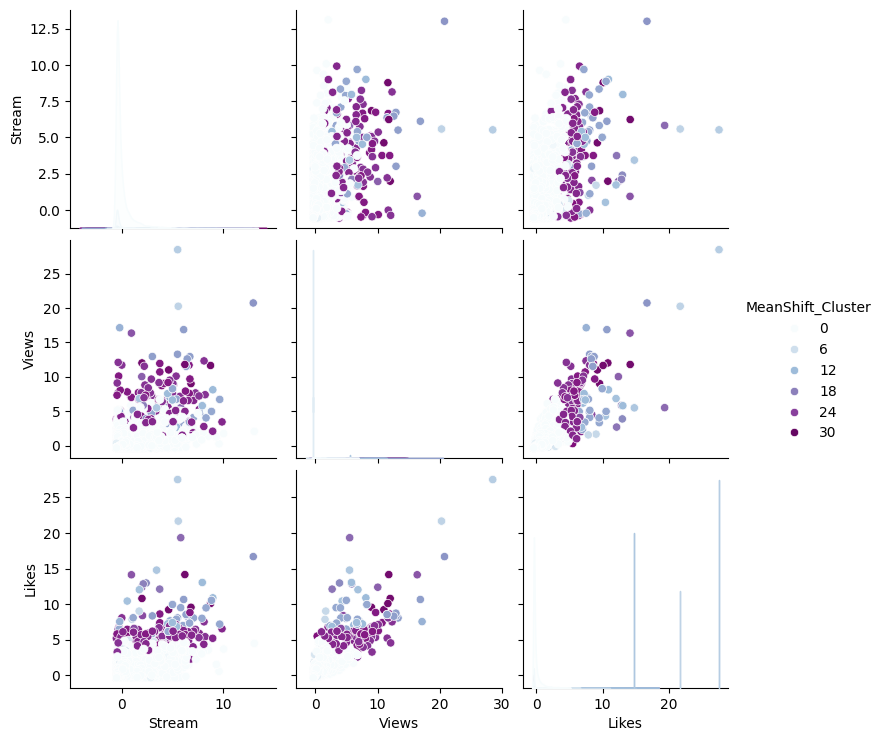

In [141]:
sns.pairplot(data_norm, vars=['Stream', 'Views', 'Likes'], hue='MeanShift_Cluster', palette='BuPu')
plt.show()

#Вывод

В ходе выполнения лабораторной работы я исследовал три метода кластеризации: KMeans, DBSCAN и Mean Shift. Для каждого из них был рассчитан силуэтный коэффициент, чтобы оценить качество кластеризации:

KMeans:

Силуэтный коэффициент составил 0.09499888846689634, что свидетельствует о слабом качестве кластеризации. Вероятно, это связано с неподходящим числом кластеров или их формой, так как алгоритм предполагает гиперсферическую структуру данных.

DBSCAN:

Силуэтный коэффициент составил 0.5965066592832218, что является наилучшим результатом среди всех методов. Это указывает на то, что DBSCAN хорошо справился с выделением плотностных кластеров и оказался устойчив к шуму в данных.

Mean Shift:

Силуэтный коэффициент составил 0.32298485450524567, что выше, чем у KMeans, но ниже, чем у DBSCAN. Вероятно, качество кластеризации можно улучшить за счет более точного выбора параметра bandwidth.

Итог:

По результатам экспериментов наиболее качественный результат показал алгоритм DBSCAN, что делает его предпочтительным для данного набора данных. Алгоритмы KMeans и Mean Shift требуют дополнительной настройки параметров, чтобы повысить их эффективность.
